<h2><center><font color=#D40004><u>(Dense Random, Hamming decoding)- Perceptron </u></font></center></h2>
<h3><center>Groupe: Mohammed NECHBA, Yassine SEDJARI, Mohammed MOUHAJIR </center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 
<center> Prof. Abdellatif EL AFIA</center>

# <font color='green'><u> Table of Contents:</u></font> <br>

<font color = 'blue'>
    
1. [Importing/Loading & checking the data.](#1)

1. [Gradient Descent & Perceptron.](#2)

1. [Training & Testing for data linear separable.](#3)

<a id = "1"></a><br>
# <font color="green"><u> I. Importing/Loading & Visualize the data:</u></font>

In [1]:
# numpy pour les opérations d'algébre linéaire sur les vecteurs et les matrices.
import numpy as np
# calculations
import math
# plotting vizualisation
import matplotlib.pyplot as plt
# pandas for read dataset
import pandas as pd
#plt.style.use('dark_background')

In [2]:
df_l_s = pd.read_csv("linearly_separable.csv")
df_l_s_n = pd.read_csv("linearly_separable_noise.csv")
df_n_l_s = pd.read_csv("no_linearly_separable.csv")

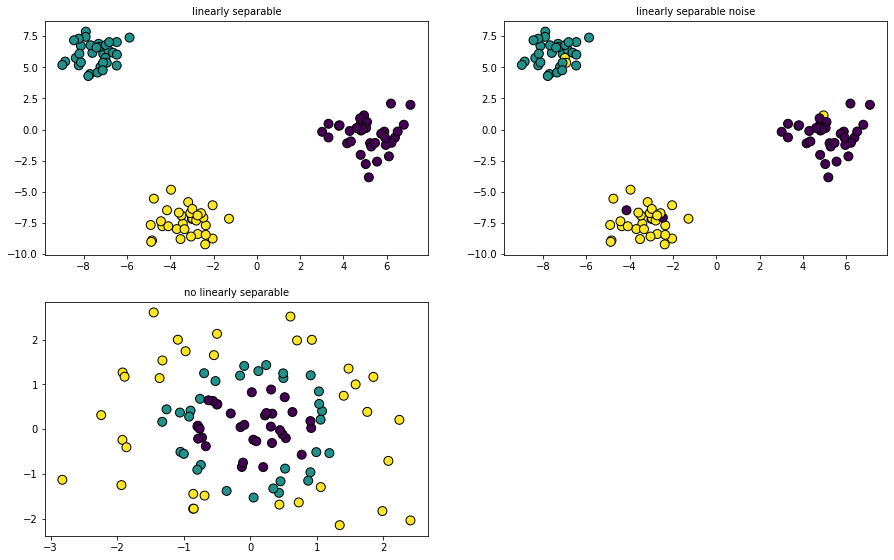

In [3]:
fig= plt.figure(figsize=(13, 13))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("linearly separable", fontsize="medium")
X1, Y1 = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(322)
plt.title("linearly separable noise", fontsize="medium")
X1, Y1 = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(323)
plt.title("no linearly separable", fontsize="medium")
X2, Y2 =df_n_l_s[['x1','x2']].to_numpy(), df_n_l_s['y'].to_numpy()
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=80, edgecolor="k")


In [4]:
def plot2D( X,y,w_list):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[1])
        y1.append(point[2])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=100 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=1
    for w in w_list:
        alpha = -w[1]/w[2]
        beta = -w[0]/w[2]
        decision_boundary = lambda x : alpha*x + beta
        if i==3:
            x2 = np.array([-2,2])
        else:
            x2 = np.array([-9,6])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "classifier "+str(i))
        i+=1
    plt.legend()


<a id = "2"></a><br>
# <font color="green"><u> II.Perceptron:</u></font>

In [5]:
def _get_cls_map(y):
    # chagement des labels y=0 en y=-1 de notre base de donnée
    return np.where(y <= 0, -1, 1)



def indecatrice(w, x, y):
    if np.sign(np.dot(w, x)) != y:
        return 1
    return 0

def Ls(w, x, y):
    n = len(y)
    s = 0
    for i in range(n):
        s += indecatrice(w, x[i], y[i])
    return s/n

def PLA(w,X, y):
    y = _get_cls_map(y)
    
    while Ls(w, X, y) != 0:
        for i in range(len(y)):
            estimator = np.dot(w, X[i])
            if np.sign(estimator)*y[i] <= 0:
                w += y[i]*X[i]
                
                # À chaque modification de wt on afficher l'erreur d'approximation.
                
                

    # Assigner les valeurs optimales
    return w

<a id = "3"></a><br>
# <font color="green"><u> III. Training & Testing for data linear separable:</u></font>

> ## Training

In [6]:
x, y = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()

In [7]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class
numdichotomizers = int(10*math.log(numLabels,10))
numdichotomizers 

4

In [8]:
def HD(x,y):
    summ=0
    for i in range(len(x)):
        summ+=1-np.sign(x[i]*y[i])
    summ/=2
    return summ

In [9]:
from scipy import stats, sparse
import scipy
# specify probability distribution
np.random.seed(42)
p_1 = 0.5 #=> p__1 = 1 - p_1 = 0.5
#rvs = stats.norm(loc=0, scale=1).rvs #normal dist
# create sparse random matrix with specific probability distribution/random numbers.
S=sparse.random(numLabels, numdichotomizers, density=p_1, data_rvs=np.ones)
Mc = []
mc=[]
for i in range(2**15):
    S=sparse.random(numLabels, numdichotomizers, density=p_1, data_rvs=np.ones)
    S=S.toarray()
    S=np.where(S==0,-1,1)
    maxdec=0
    decval=0
    for cw1 in S:
        for cw2 in S:
            decval+=HD(cw1,cw2)
    if(maxdec<decval):
        maxdec=decval
        mc=S
        
print("Mc that maximizes HD is :\n",mc)        

Mc that maximizes HD is :
 [[-1  1 -1 -1]
 [-1 -1  1 -1]
 [ 1  1  1  1]]


In [10]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [11]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateur
classifiers = np.zeros(shape=(numdichotomizers, numFeatures + 1))
classifiers

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
df_x=  pd.DataFrame(X,columns=['x0','x1','x2'])
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)
df

,x0,x1,x2,y
0,1.0,-7.309197,6.888637,1
1,1.0,-8.127534,6.727554,1
2,1.0,-8.852429,5.461920,1
3,1.0,-7.098227,6.075027,1
4,1.0,-2.998033,-7.174123,2
...,...,...,...,...
95,1.0,-4.880556,-9.018662,2
96,1.0,4.344281,-0.949114,0
97,1.0,-7.784848,4.301216,1
98,1.0,-2.042091,-6.079164,2


In [13]:
for j in range(numdichotomizers):
    ones=[]
    zeros=[]
    for i in range(numLabels):
        if(mc[i][j]==1):
            ones.append(i)
        else:
            zeros.append(i)
    df_label01 = df.copy()
    df_label01["y"] = df_label01["y"].isin(ones).astype(int)
    label = df_label01.y
    initial_w = np.ones(X.shape[1])
    X_=  df_label01[['x0','x1','x2']].to_numpy()
    classifiers[j, :] = PLA(initial_w,X_,label)
    
classifiers    

array([[-10.        ,  -6.8389183 , -10.47982186],
       [  1.        ,   4.34568731, -10.71852172],
       [  3.        , -10.12556723,   0.55343176],
       [-10.        ,  -6.8389183 , -10.47982186]])

In [14]:
# # Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
# for c in range(0, numLabels):
#     label = (y == c).astype(int)
#     initial_w = np.ones(X.shape[1])
#     classifiers[c, :] = PLA(initial_w,X,label)


In [15]:
classifiers

array([[-10.        ,  -6.8389183 , -10.47982186],
       [  1.        ,   4.34568731, -10.71852172],
       [  3.        , -10.12556723,   0.55343176],
       [-10.        ,  -6.8389183 , -10.47982186]])

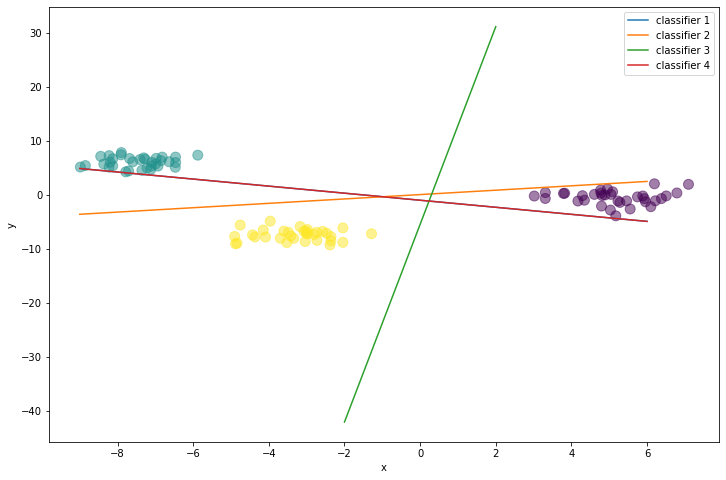

In [16]:
plot2D( X,y,classifiers)

>## Predictions

In [17]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [18]:
classProbabilities

array([[ -32.20468294, -104.59948774,   80.82215809,  -32.20468294],
       [ -24.92002723, -106.42915965,   89.01913751,  -24.92002723],
       [  -6.69890923,  -96.01359601,   95.65866507,   -6.69890923],
       [ -25.12101154,  -94.96198783,   78.23568648,  -25.12101154],
       [  85.68682821,   64.86747466,   29.38639639,   85.68682821],
       [ -39.10459914,   14.22119472,  -35.21572908,  -39.10459914],
       [ -30.00251664,  -97.19316147,   75.93983148,  -30.00251664],
       [ -46.84085893,   35.6805556 ,  -61.96803829,  -46.84085893],
       [  80.97782245,   59.84825962,   29.82275012,   80.97782245],
       [ -41.4194847 ,   39.39999606,  -60.56632909,  -41.4194847 ],
       [ -34.31322527,   35.4588073 ,  -50.57608192,  -34.31322527],
       [ -22.57634108,  -98.02545679,   83.34088628,  -22.57634108],
       [  -5.15497659,   64.63023005,  -51.51394348,   -5.15497659],
       [ -74.25252456,    5.54296785,  -58.57708004,  -74.25252456],
       [ -29.2709847 ,  -94.001053

In [19]:
codewords=classProbabilities
for cw in codewords:
    for j in range(len(cw)):
        if(cw[j]>=0):
            cw[j]=1
        else:
            cw[j]=-1

In [20]:
classProbabilities

array([[-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [-1., -1.,  1., -1.],
       [-1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [-1.,  1., -1., -1.],
       [-1., -1.,  1., -1.],
       [-1.,  1., -1., -1.],
       [-1.,  1., -1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.],
       [-1., -1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1.,  1., -1., -1.],
       [-1.,  1., -1., -1.],
       [-1., -1.,  1., -1.],
       [ 1.,  

In [21]:
classe_min=0
predictions=[]
for cw in codewords:
    dmin=float("+inf")
    for classe in range(len(mc)):
        d=HD(cw,mc[classe])
        if(d<dmin):
            dmin=d
            classe_min=classe
    predictions.append(classe_min)       

>## Accuracy

In [22]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 100.0%
